In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import geopandas as gpd
import warnings
from census import Census
from us import states
import os
import seaborn as sns
from tabulate import tabulate
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
%config InlineBackend.figure_format ='retina'
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
c = Census("7503d874dc67f8d291480cde3afcf2dc3d5cb890")

In [7]:
variables = [
    'B19013_001E',  # Median household income
    'C16002_004E',  # Spanish: Linguistically isolated
    'C16002_007E',  # Other Indo-European: Linguistically isolated
    'C16002_010E',  # Asian and Pacific Island languages: Linguistically isolated
    'C16002_013E',  # Other languages: Linguistically isolated
    'B11001_001E'   # Total households
]

education_variables = [
    'B15003_001E',   # Total population 25 years and over
    'B15003_022E',  # Bachelor's degree
    'B15003_023E'   # Master's degree
]

employment_variables = [
    'B23025_001E',  # Total in labor force
    'B23025_002E',  # In labor force
    'B23025_004E'   # Employed
]

In [8]:
data = c.acs5.state_county_tract(
    fields=['NAME'] + variables + education_variables + employment_variables,
    state_fips=states.TX.fips,
    county_fips='113',  # FIPS code for Dallas County
    tract='*',
    year=2019
)

In [28]:
df = pd.DataFrame(data)

In [29]:
df['Pct_Bachelors_Degree'] = df['B15003_022E'] / df['B15003_001E'] * 100
df['Pct_Masters_Degree'] = df['B15003_023E'] / df['B15003_001E'] * 100

In [30]:
df['Employment_Rate'] = df['B23025_004E'] / df['B23025_002E'] * 100


In [31]:
df['Pct_Spanish_Linguistically_Isolated'] = df['C16002_004E'] / df['B11001_001E'] * 100
df['Pct_Indo_European_Linguistically_Isolated'] = df['C16002_007E'] / df['B11001_001E'] * 100
df['Pct_Asian_Pacific_Island_Linguistically_Isolated'] = df['C16002_010E'] / df['B11001_001E'] * 100
df['Pct_Other_Languages_Linguistically_Isolated'] = df['C16002_013E'] / df['B11001_001E'] * 100

In [32]:
df['geo_id'] = df['state'] + df['county'] + df['tract']
df = df.drop(columns=['state', 'county', 'tract', 'B15003_001E', 'B23025_001E', 'B23025_002E', 'B23025_004E'])


In [33]:
cols_to_check = [
    'B19013_001E', 'Pct_Spanish_Linguistically_Isolated', 'Pct_Indo_European_Linguistically_Isolated', 
    'Pct_Asian_Pacific_Island_Linguistically_Isolated', 'Pct_Other_Languages_Linguistically_Isolated'
]
for col in cols_to_check:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

for col in cols_to_check:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [34]:
df = df.rename(columns={
    'B19013_001E': 'Median_Income',
    'C16002_004E': 'Spanish_Linguistically_Isolated',
    'C16002_007E': 'Indo_European_Linguistically_Isolated',
    'C16002_010E': 'Asian_Pacific_Island_Linguistically_Isolated',
    'C16002_013E': 'Other_Languages_Linguistically_Isolated',
    'B15003_022E': 'Bachelors_Degree',
    'B15003_023E': 'Masters_Degree',
    'Pct_Bachelors_Degree': 'Pct_Bachelors_Degree',
    'Pct_Masters_Degree': 'Pct_Masters_Degree',
    'Employment_Rate': 'Employment_Rate',
    'B11001_001E' : 'Total Households'
})

,NAME,Median_Income,Spanish_Linguistically_Isolated,Indo_European_Linguistically_Isolated,Asian_Pacific_Island_Linguistically_Isolated,Other_Languages_Linguistically_Isolated,Total Households,Bachelors_Degree,Masters_Degree,Pct_Bachelors_Degree,Pct_Masters_Degree,Employment_Rate,Pct_Spanish_Linguistically_Isolated,Pct_Indo_European_Linguistically_Isolated,Pct_Asian_Pacific_Island_Linguistically_Isolated,Pct_Other_Languages_Linguistically_Isolated,geo_id
240,"Census Tract 141.03, Dallas County, Texas",50054.0,85.0,171.0,27.0,9.0,1625.0,554.0,565.0,20.571853,20.980319,97.582958,5.230769,10.523077,1.661538,0.553846,48113014103
267,"Census Tract 141.14, Dallas County, Texas",48663.0,54.0,149.0,0.0,0.0,1558.0,592.0,180.0,24.853065,7.556675,95.101864,3.465982,9.563543,0.000000,0.000000,48113014114
68,"Census Tract 136.20, Dallas County, Texas",71328.0,43.0,190.0,144.0,16.0,3423.0,1876.0,877.0,40.326741,18.852107,97.306397,1.256208,5.550687,4.206836,0.467426,48113013620
362,"Census Tract 137.19, Dallas County, Texas",81406.0,70.0,92.0,38.0,0.0,1742.0,987.0,289.0,28.427419,8.323733,97.591298,4.018370,5.281286,2.181401,0.000000,48113013719
122,"Census Tract 78.15, Dallas County, Texas",37857.0,203.0,108.0,273.0,90.0,2048.0,386.0,174.0,11.549970,5.206463,89.411355,9.912109,5.273438,13.330078,4.394531,48113007815


In [36]:
independent_vars = ['Pct_Spanish_Linguistically_Isolated', 'Pct_Indo_European_Linguistically_Isolated', 
                    'Pct_Asian_Pacific_Island_Linguistically_Isolated', 'Pct_Other_Languages_Linguistically_Isolated',
                    'Pct_Bachelors_Degree', 'Pct_Masters_Degree', 'Employment_Rate']

# Replace negative values with NaN and fill NaN values with the column mean
for col in independent_vars:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)
    df[col].fillna(df[col].mean(), inplace=True)

# Add a constant to the independent variables matrix (intercept)
X = df[independent_vars]
X = sm.add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                                           Variable          VIF
0                                             const  1254.059185
1               Pct_Spanish_Linguistically_Isolated     1.707664
2         Pct_Indo_European_Linguistically_Isolated     1.087706
3  Pct_Asian_Pacific_Island_Linguistically_Isolated     1.146087
4       Pct_Other_Languages_Linguistically_Isolated     1.158757
5                              Pct_Bachelors_Degree     4.612136
6                                Pct_Masters_Degree     4.072096
7                                   Employment_Rate     1.271573


In [37]:
# Define the independent variables (X) and dependent variable (Y)
cols_to_clean = ['Median_Income', 'Pct_Spanish_Linguistically_Isolated', 
                 'Pct_Indo_European_Linguistically_Isolated', 
                 'Pct_Asian_Pacific_Island_Linguistically_Isolated', 
                 'Pct_Other_Languages_Linguistically_Isolated', 
                 'Pct_Bachelors_Degree', 'Pct_Masters_Degree', 
                 'Employment_Rate']

# Drop rows with any NaN values in the relevant columns for regression
df_clean = df.dropna(subset=cols_to_clean)

X = df_clean[['Pct_Spanish_Linguistically_Isolated', 'Pct_Indo_European_Linguistically_Isolated', 
              'Pct_Asian_Pacific_Island_Linguistically_Isolated', 'Pct_Other_Languages_Linguistically_Isolated',
              'Pct_Bachelors_Degree', 'Pct_Masters_Degree', 'Employment_Rate']]
Y = df_clean['Median_Income']

# Add a constant to the independent variables matrix (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Extract and print important parts of the results
summary = model.summary2().tables[1]
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
f_statistic = model.fvalue
f_pvalue = model.f_pvalue

print("OLS Regression Results")
print("=" * 30)
print(f"R-squared: {r_squared:.3f}")
print(f"Adjusted R-squared: {adj_r_squared:.3f}")
print(f"F-statistic: {f_statistic:.2f}")
print(f"Prob (F-statistic): {f_pvalue:.2e}")
print("\nCoefficients:")
print(summary[['Coef.', 'P>|t|']])

# Detailed interpretation for each variable
for index, row in summary.iterrows():
    coef = row['Coef.']
    p_value = row['P>|t|']
    if p_value < 0.05:
        sig = "statistically significant"
    else:
        sig = "not statistically significant"
    
    if coef < 0:
        effect = "negative"
    else:
        effect = "positive"
    
    print(f"The coefficient for {index} is {coef:.2f}, which means it has a {effect} effect on the median income. This effect is {sig} (p-value = {p_value:.3f}).")

OLS Regression Results
R-squared: 0.602
Adjusted R-squared: 0.596
F-statistic: 112.08
Prob (F-statistic): 1.51e-99

Coefficients:
                                                         Coef.         P>|t|
const                                            -60456.042526  1.234608e-01
Pct_Spanish_Linguistically_Isolated                 -12.125355  9.279748e-01
Pct_Indo_European_Linguistically_Isolated         -5103.531965  2.183057e-06
Pct_Asian_Pacific_Island_Linguistically_Isolated   -347.815689  5.978281e-01
Pct_Other_Languages_Linguistically_Isolated       -3202.695396  1.741082e-02
Pct_Bachelors_Degree                                999.252510  5.514500e-09
Pct_Masters_Degree                                 2128.750945  1.613535e-12
Employment_Rate                                     996.564647  1.892365e-02
The coefficient for const is -60456.04, which means it has a negative effect on the median income. This effect is not statistically significant (p-value = 0.123).
The coefficien

In [38]:
shapefile_url = 'https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_48_tract.zip'
dallas_tracts = gpd.read_file(shapefile_url)
dallas_tracts = dallas_tracts[dallas_tracts['COUNTYFP'] == '113']
dallas_tracts = dallas_tracts.rename(columns={'GEOID': 'geo_id'})
merged = dallas_tracts.merge(df, on='geo_id')

In [39]:
cols_to_check = ['Median_Income', 'Pct_Spanish_Linguistically_Isolated', 
                 'Pct_Indo_European_Linguistically_Isolated', 
                 'Pct_Asian_Pacific_Island_Linguistically_Isolated', 
                 'Pct_Other_Languages_Linguistically_Isolated',
                 'Pct_Bachelors_Degree', 'Pct_Masters_Degree', 'Employment_Rate']
correlation = merged[cols_to_check].corr()

In [40]:
# Calculate and print the correlation coefficients for each linguistic isolation category with Median Income

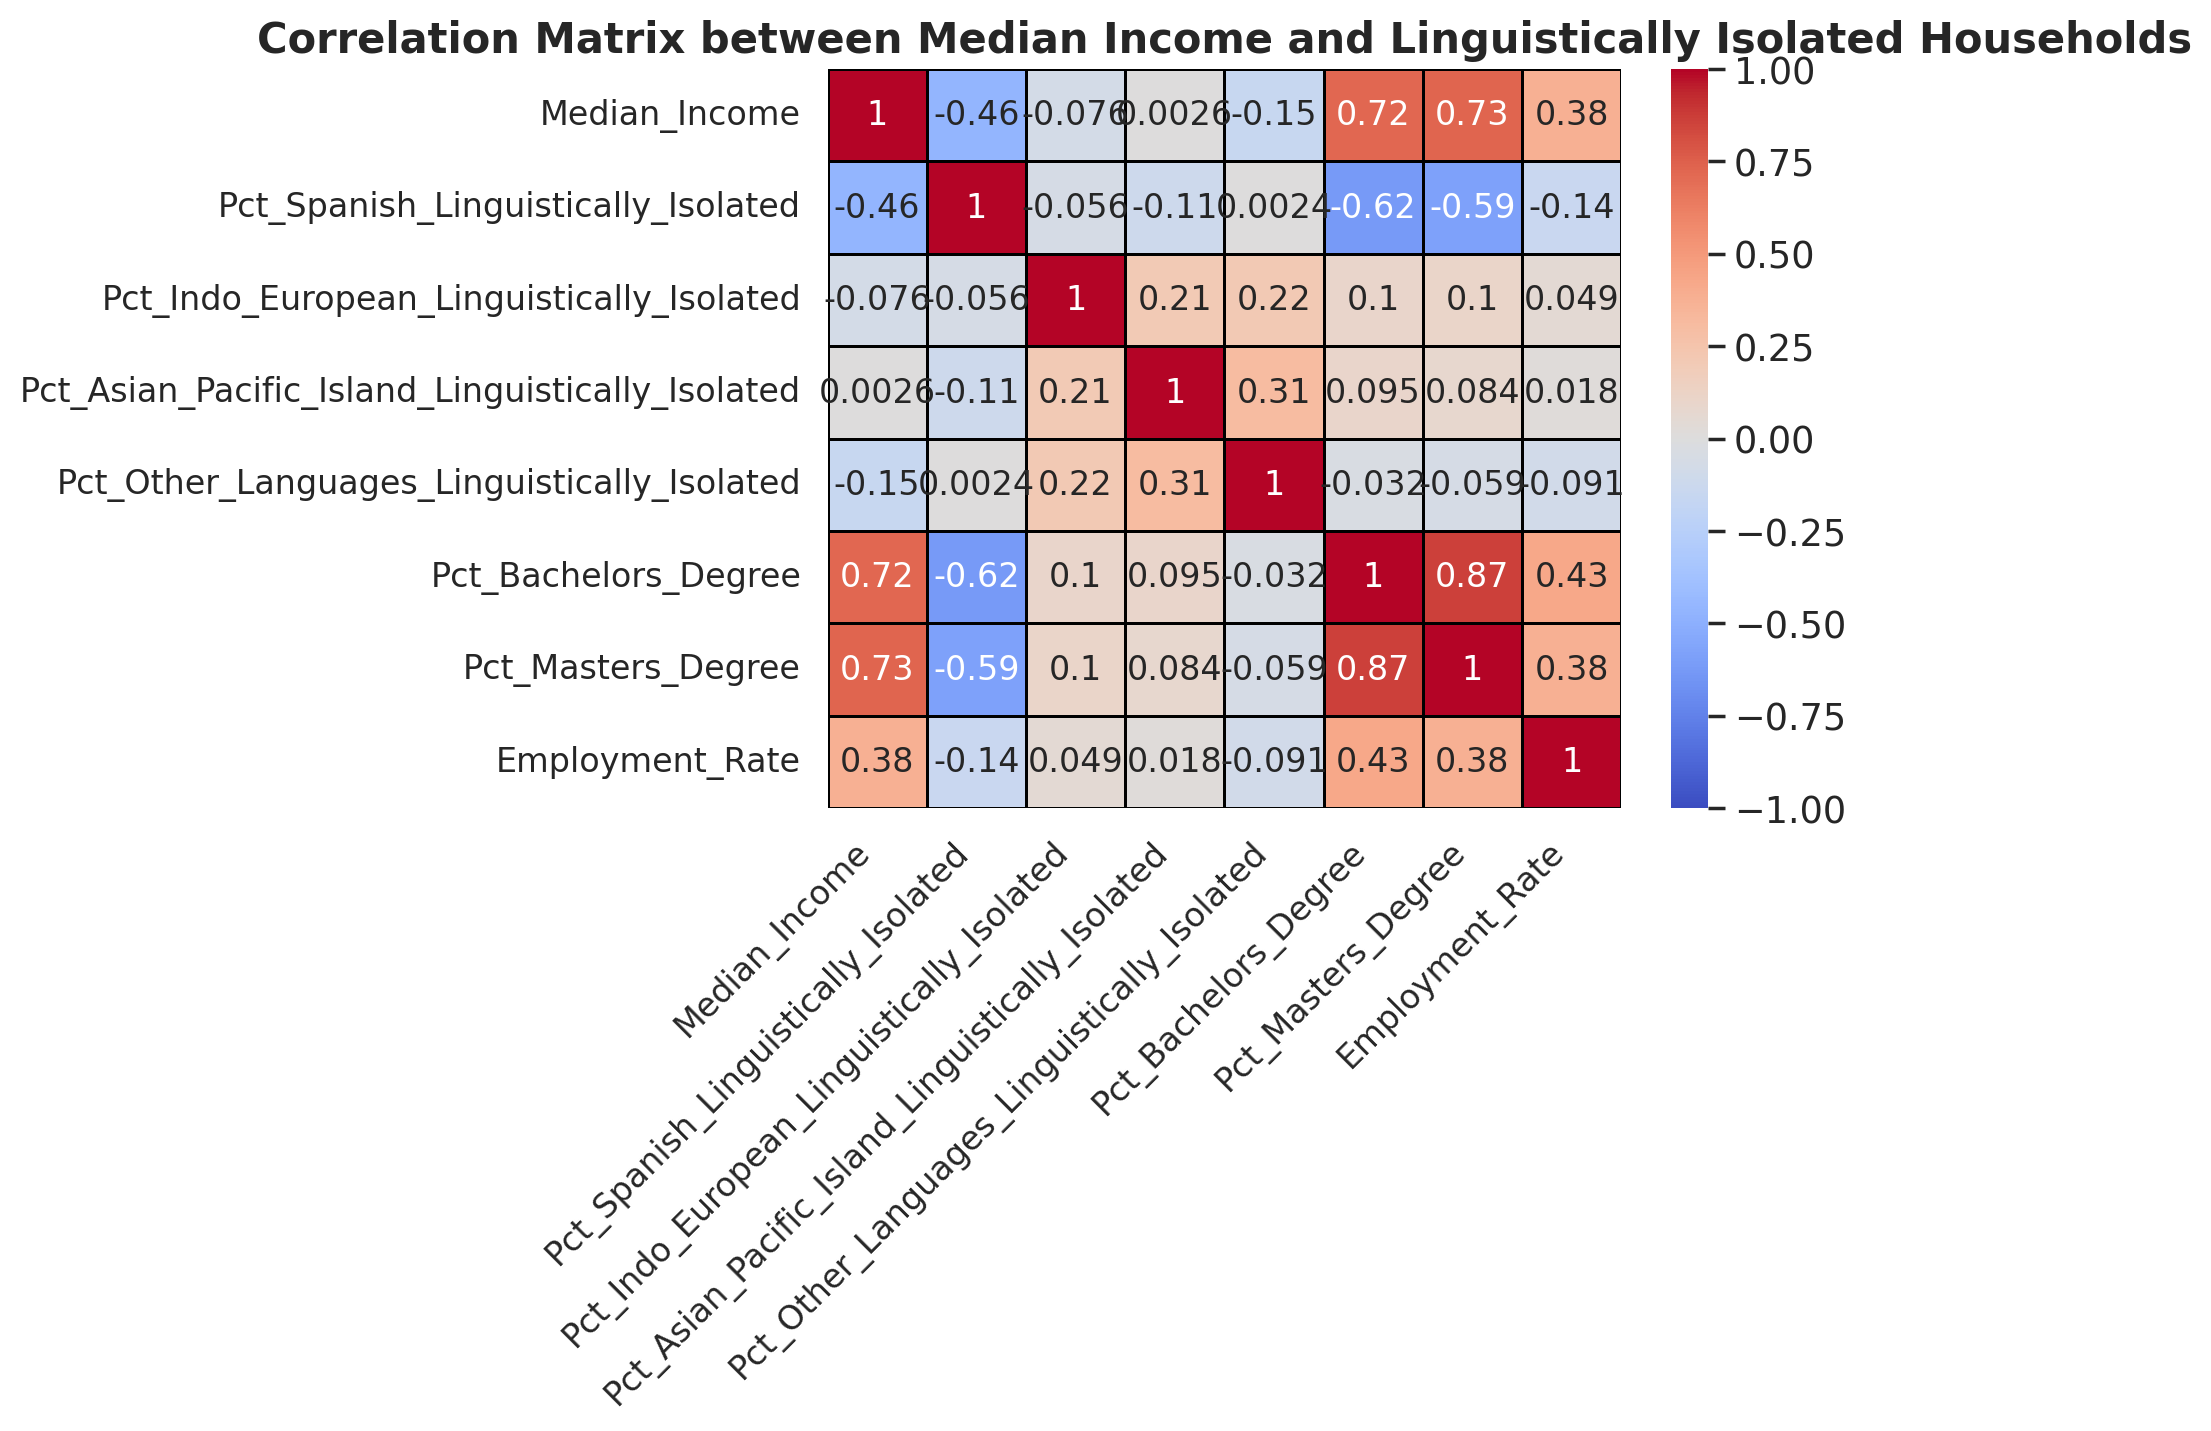

In [41]:
plt.figure()
sns.set(font_scale=1.2)
heatmap = sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, annot_kws={"size": 12}, linewidths=.5, linecolor='black', cmap='coolwarm')
heatmap.set_title('Correlation Matrix between Median Income and Linguistically Isolated Households', fontsize=15, weight='bold')
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show
plt.savefig('correlation_matrix1.png',bbox_inches='tight', format='png')

In [42]:
correlation_summary = pd.DataFrame({
    'Correlation with Median Income': correlation['Median_Income'],
    'Strength of Correlation': [
        'Strong Negative' if x < -0.7 else 
        'Moderate Negative' if x < -0.3 else 
        'Weak Negative' if x < 0 else 
        'Weak Positive' if x < 0.3 else 
        'Moderate Positive' if x < 0.7 else 
        'Strong Positive' 
        for x in correlation['Median_Income']
    ]
})
print(tabulate(correlation_summary, headers='keys', tablefmt='grid'))

+--------------------------------------------------+----------------------------------+---------------------------+
|                                                  |   Correlation with Median Income | Strength of Correlation   |
+==================================================+==================================+===========================+
| Median_Income                                    |                       1          | Strong Positive           |
+--------------------------------------------------+----------------------------------+---------------------------+
| Pct_Spanish_Linguistically_Isolated              |                      -0.462538   | Moderate Negative         |
+--------------------------------------------------+----------------------------------+---------------------------+
| Pct_Indo_European_Linguistically_Isolated        |                      -0.076083   | Weak Negative             |
+--------------------------------------------------+--------------------

In [43]:
income_cmap = mcolors.LinearSegmentedColormap.from_list("IncomeMap", ["blue", "lightblue", "white", "yellow", "red"])
percent_cmap = mcolors.LinearSegmentedColormap.from_list("PercentMap", ["lightgrey", "black"])
#percent_cmap = mcolors.LinearSegmentedColormap.from_list("PercentMap", plt.get_cmap('RdPu')(range(256)))


In [49]:
def plot_column(column, title, cmap, filename, dpi=300):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged.plot(column=column, ax=ax, legend=True,
                legend_kwds={'label': title, 'orientation': 'horizontal'},
                cmap=cmap, missing_kwds={"color": "grey", "label": "No Data", "hatch": "///"})
    ax.set_title(title, fontsize=20)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', format='png', dpi=dpi)
    plt.close(fig)  # Close the figure to save memory

# Plot the data using the specified colormaps and save each plot individually with higher resolution
plot_column('Median_Income', 'Median Income in Dallas County', income_cmap, 'Median_Income.png', dpi=300)
plot_column('Pct_Spanish_Linguistically_Isolated', 'Percentage of Spanish Linguistically Isolated Households in Dallas County', percent_cmap, 'Pct_Spanish_Linguistically_Isolated.png', dpi=300)
plot_column('Pct_Indo_European_Linguistically_Isolated', 'Percentage of Indo-European Linguistically Isolated Households in Dallas County', percent_cmap, 'Pct_Indo_European_Linguistically_Isolated.png', dpi=300)
plot_column('Pct_Asian_Pacific_Island_Linguistically_Isolated', 'Percentage of Asian and Pacific Island Linguistically Isolated Households in Dallas County', percent_cmap, 'Pct_Asian_Pacific_Island_Linguistically_Isolated.png', dpi=300)
plot_column('Pct_Other_Languages_Linguistically_Isolated', 'Percentage of Other Languages Linguistically Isolated Households in Dallas County', percent_cmap, 'Pct_Other_Languages_Linguistically_Isolated.png', dpi=300)
plot_column('Pct_Bachelors_Degree', 'Percentage of Population with Bachelors Degree in Dallas County', percent_cmap, 'Pct_Bachelors_Degree.png', dpi=300)
plot_column('Pct_Masters_Degree', 'Percentage of Population with Masters Degree in Dallas County', percent_cmap, 'Pct_Masters_Degree.png', dpi=300)
plot_column('Employment_Rate', 'Employment Rate in Dallas County', percent_cmap, 'Employment_Rate.png', dpi=300)


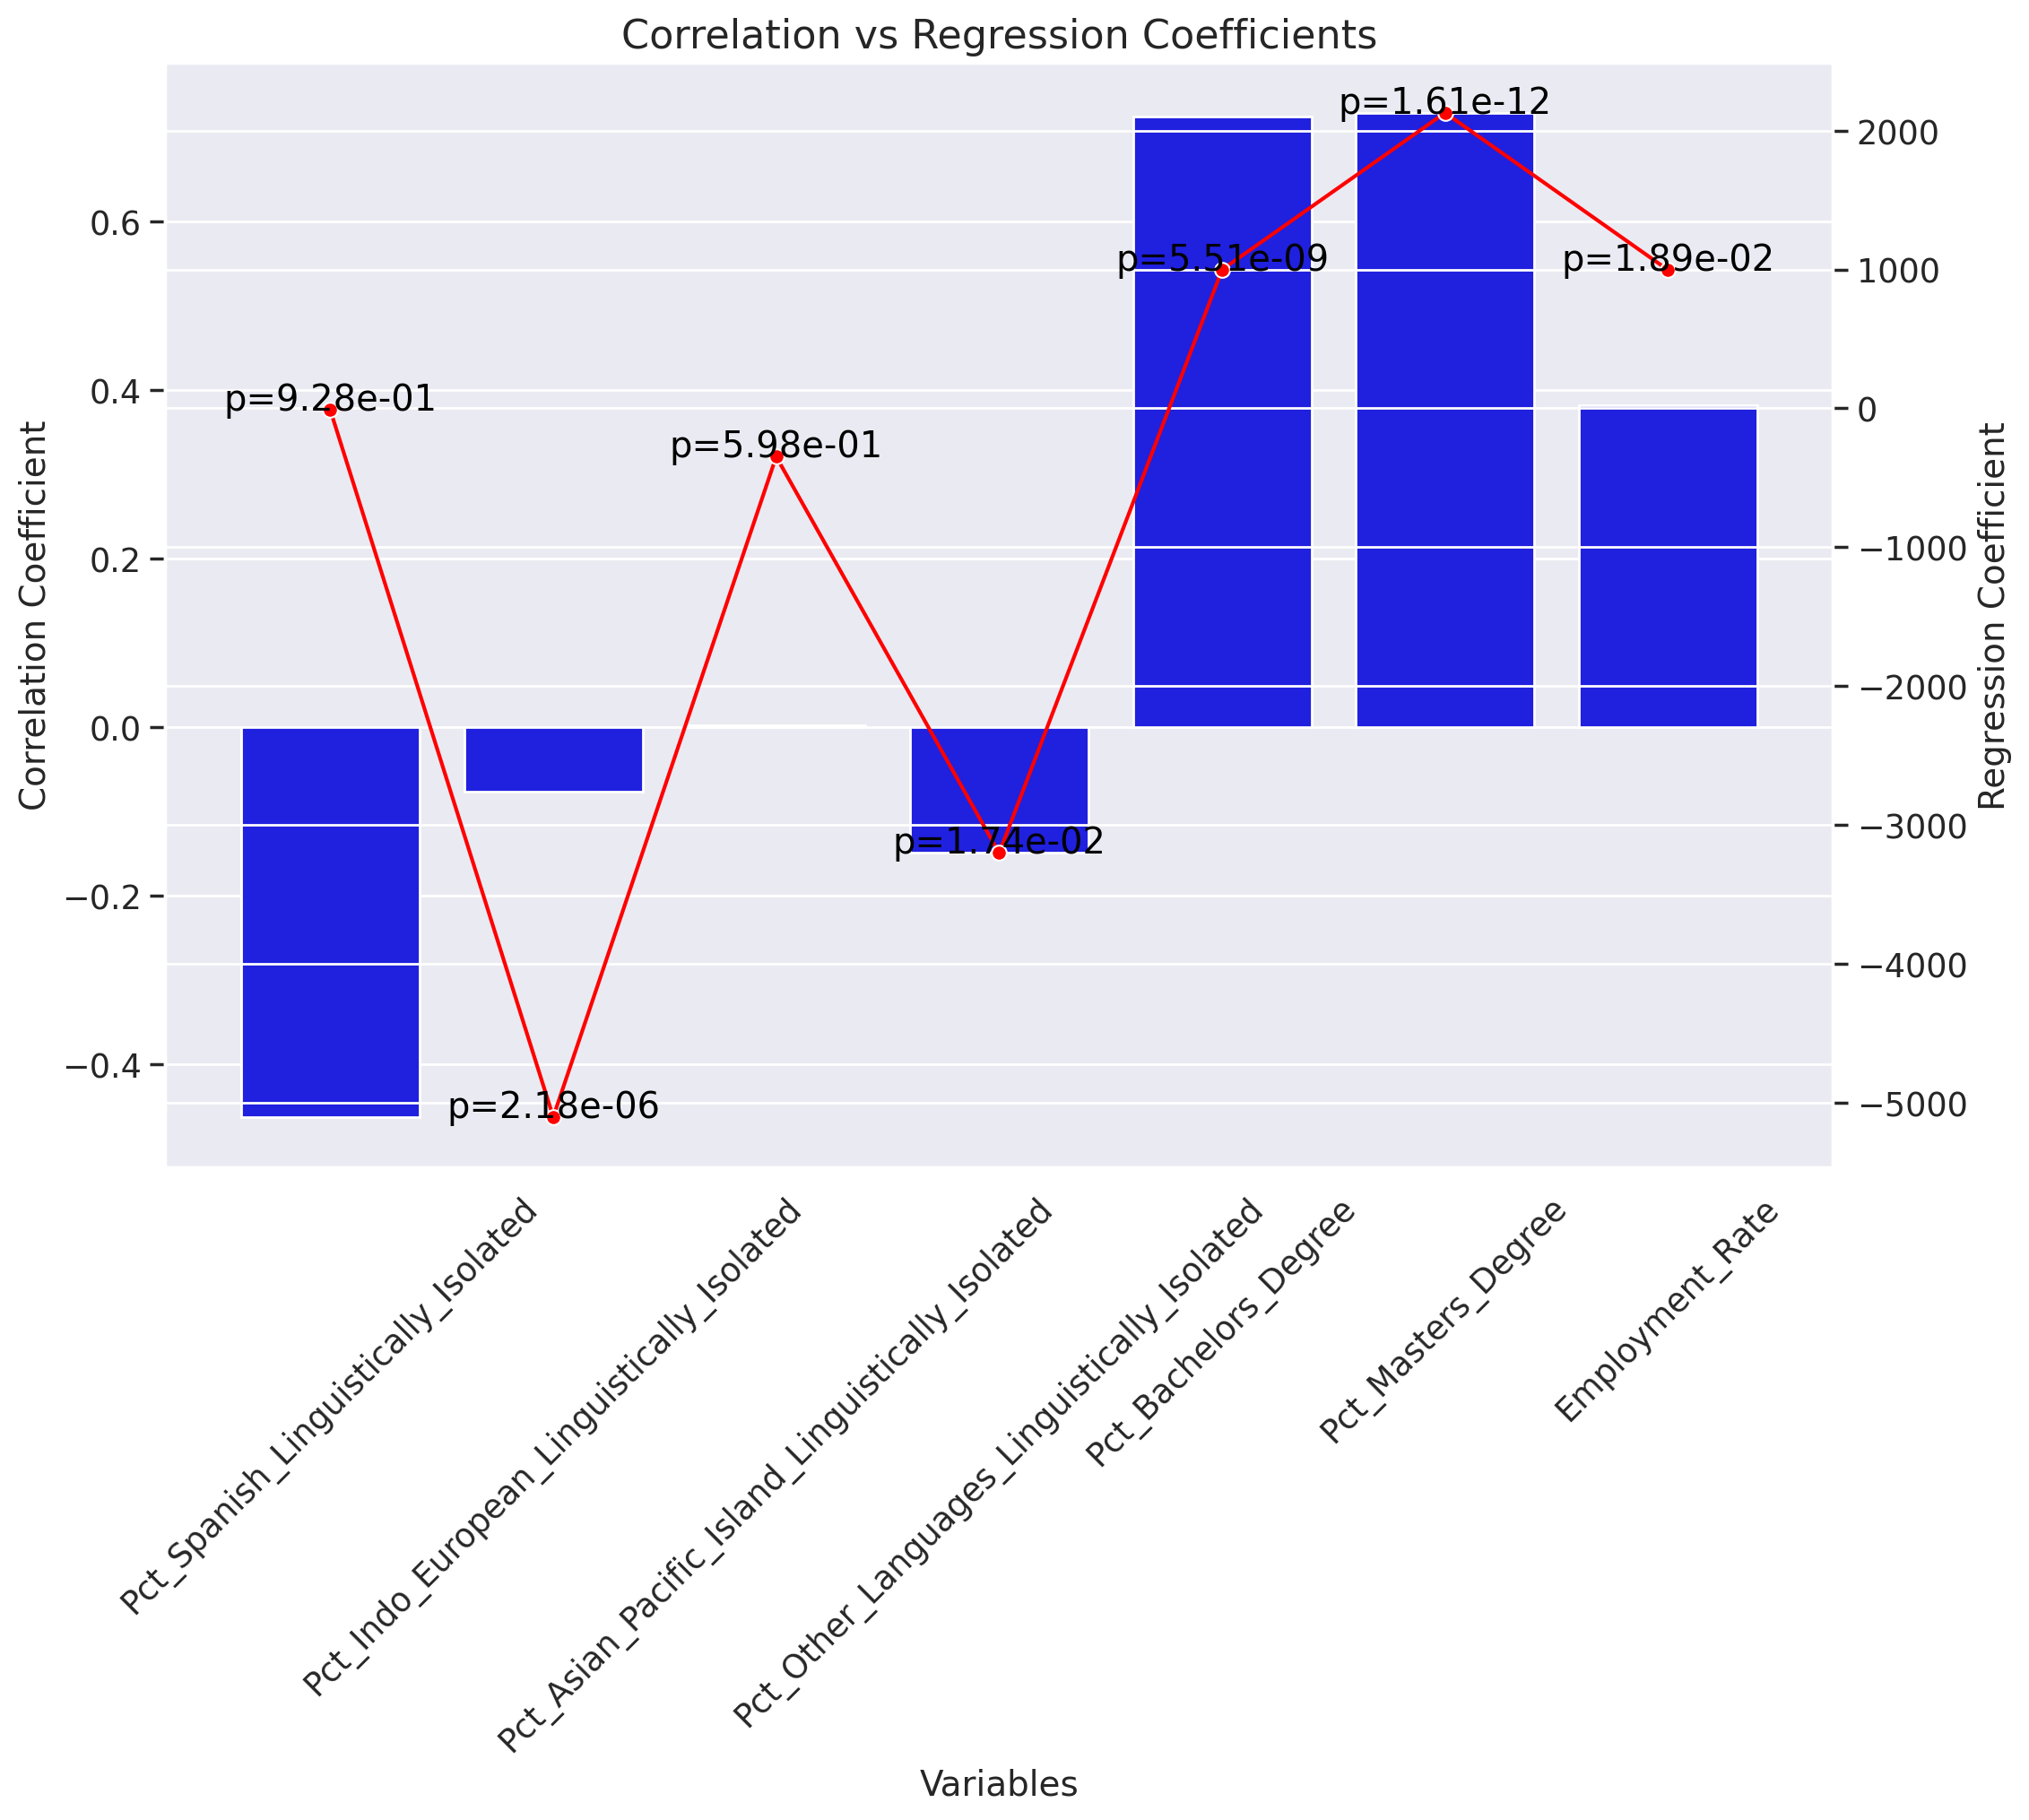


Summary of Correlation and Regression Results
Variable: Pct_Spanish_Linguistically_Isolated
  Correlation with Median Income: -0.463
  Regression Coefficient: -12.13
  P-Value: 9.280e-01
--------------------------------------------------
Variable: Pct_Indo_European_Linguistically_Isolated
  Correlation with Median Income: -0.076
  Regression Coefficient: -5103.53
  P-Value: 2.183e-06
--------------------------------------------------
Variable: Pct_Asian_Pacific_Island_Linguistically_Isolated
  Correlation with Median Income: 0.003
  Regression Coefficient: -347.82
  P-Value: 5.978e-01
--------------------------------------------------
Variable: Pct_Other_Languages_Linguistically_Isolated
  Correlation with Median Income: -0.149
  Regression Coefficient: -3202.70
  P-Value: 1.741e-02
--------------------------------------------------
Variable: Pct_Bachelors_Degree
  Correlation with Median Income: 0.725
  Regression Coefficient: 999.25
  P-Value: 5.514e-09
-----------------------------

In [47]:
correlation_summary = pd.DataFrame({
    'Variable': ['Pct_Spanish_Linguistically_Isolated', 'Pct_Indo_European_Linguistically_Isolated',
                 'Pct_Asian_Pacific_Island_Linguistically_Isolated', 'Pct_Other_Languages_Linguistically_Isolated',
                 'Pct_Bachelors_Degree', 'Pct_Masters_Degree', 'Employment_Rate'],
    'Correlation': [correlation['Median_Income']['Pct_Spanish_Linguistically_Isolated'],
                    correlation['Median_Income']['Pct_Indo_European_Linguistically_Isolated'],
                    correlation['Median_Income']['Pct_Asian_Pacific_Island_Linguistically_Isolated'],
                    correlation['Median_Income']['Pct_Other_Languages_Linguistically_Isolated'],
                    correlation['Median_Income']['Pct_Bachelors_Degree'],
                    correlation['Median_Income']['Pct_Masters_Degree'],
                    correlation['Median_Income']['Employment_Rate']],
    'Regression Coefficient': [model.params['Pct_Spanish_Linguistically_Isolated'],
                               model.params['Pct_Indo_European_Linguistically_Isolated'],
                               model.params['Pct_Asian_Pacific_Island_Linguistically_Isolated'],
                               model.params['Pct_Other_Languages_Linguistically_Isolated'],
                               model.params['Pct_Bachelors_Degree'],
                               model.params['Pct_Masters_Degree'],
                               model.params['Employment_Rate']],
    'P-Value': [model.pvalues['Pct_Spanish_Linguistically_Isolated'],
                model.pvalues['Pct_Indo_European_Linguistically_Isolated'],
                model.pvalues['Pct_Asian_Pacific_Island_Linguistically_Isolated'],
                model.pvalues['Pct_Other_Languages_Linguistically_Isolated'],
                model.pvalues['Pct_Bachelors_Degree'],
                model.pvalues['Pct_Masters_Degree'],
                model.pvalues['Employment_Rate']]
})

# Plot the correlation vs regression coefficients
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for correlation
ax1 = sns.barplot(x='Variable', y='Correlation', data=correlation_summary, color='blue')
ax1.set_ylabel('Correlation Coefficient', fontsize=14)
ax1.set_xlabel('Variables', fontsize=14)
ax1.set_title('Correlation vs Regression Coefficients', fontsize=16)
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis to plot the regression coefficients
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Variable', y='Regression Coefficient', data=correlation_summary, marker='o', color='red')
ax2.set_ylabel('Regression Coefficient', fontsize=14)

# Annotate p-values on the regression coefficient points
for i in range(correlation_summary.shape[0]):
    ax2.text(i, correlation_summary['Regression Coefficient'][i], f"p={correlation_summary['P-Value'][i]:.2e}", 
             color='black', ha='center')

plt.show()

# Print out the summary of correlation and regression results
print("\nSummary of Correlation and Regression Results")
print("=" * 50)
for index, row in correlation_summary.iterrows():
    print(f"Variable: {row['Variable']}")
    print(f"  Correlation with Median Income: {row['Correlation']:.3f}")
    print(f"  Regression Coefficient: {row['Regression Coefficient']:.2f}")
    print(f"  P-Value: {row['P-Value']:.3e}")
    print("-" * 50)

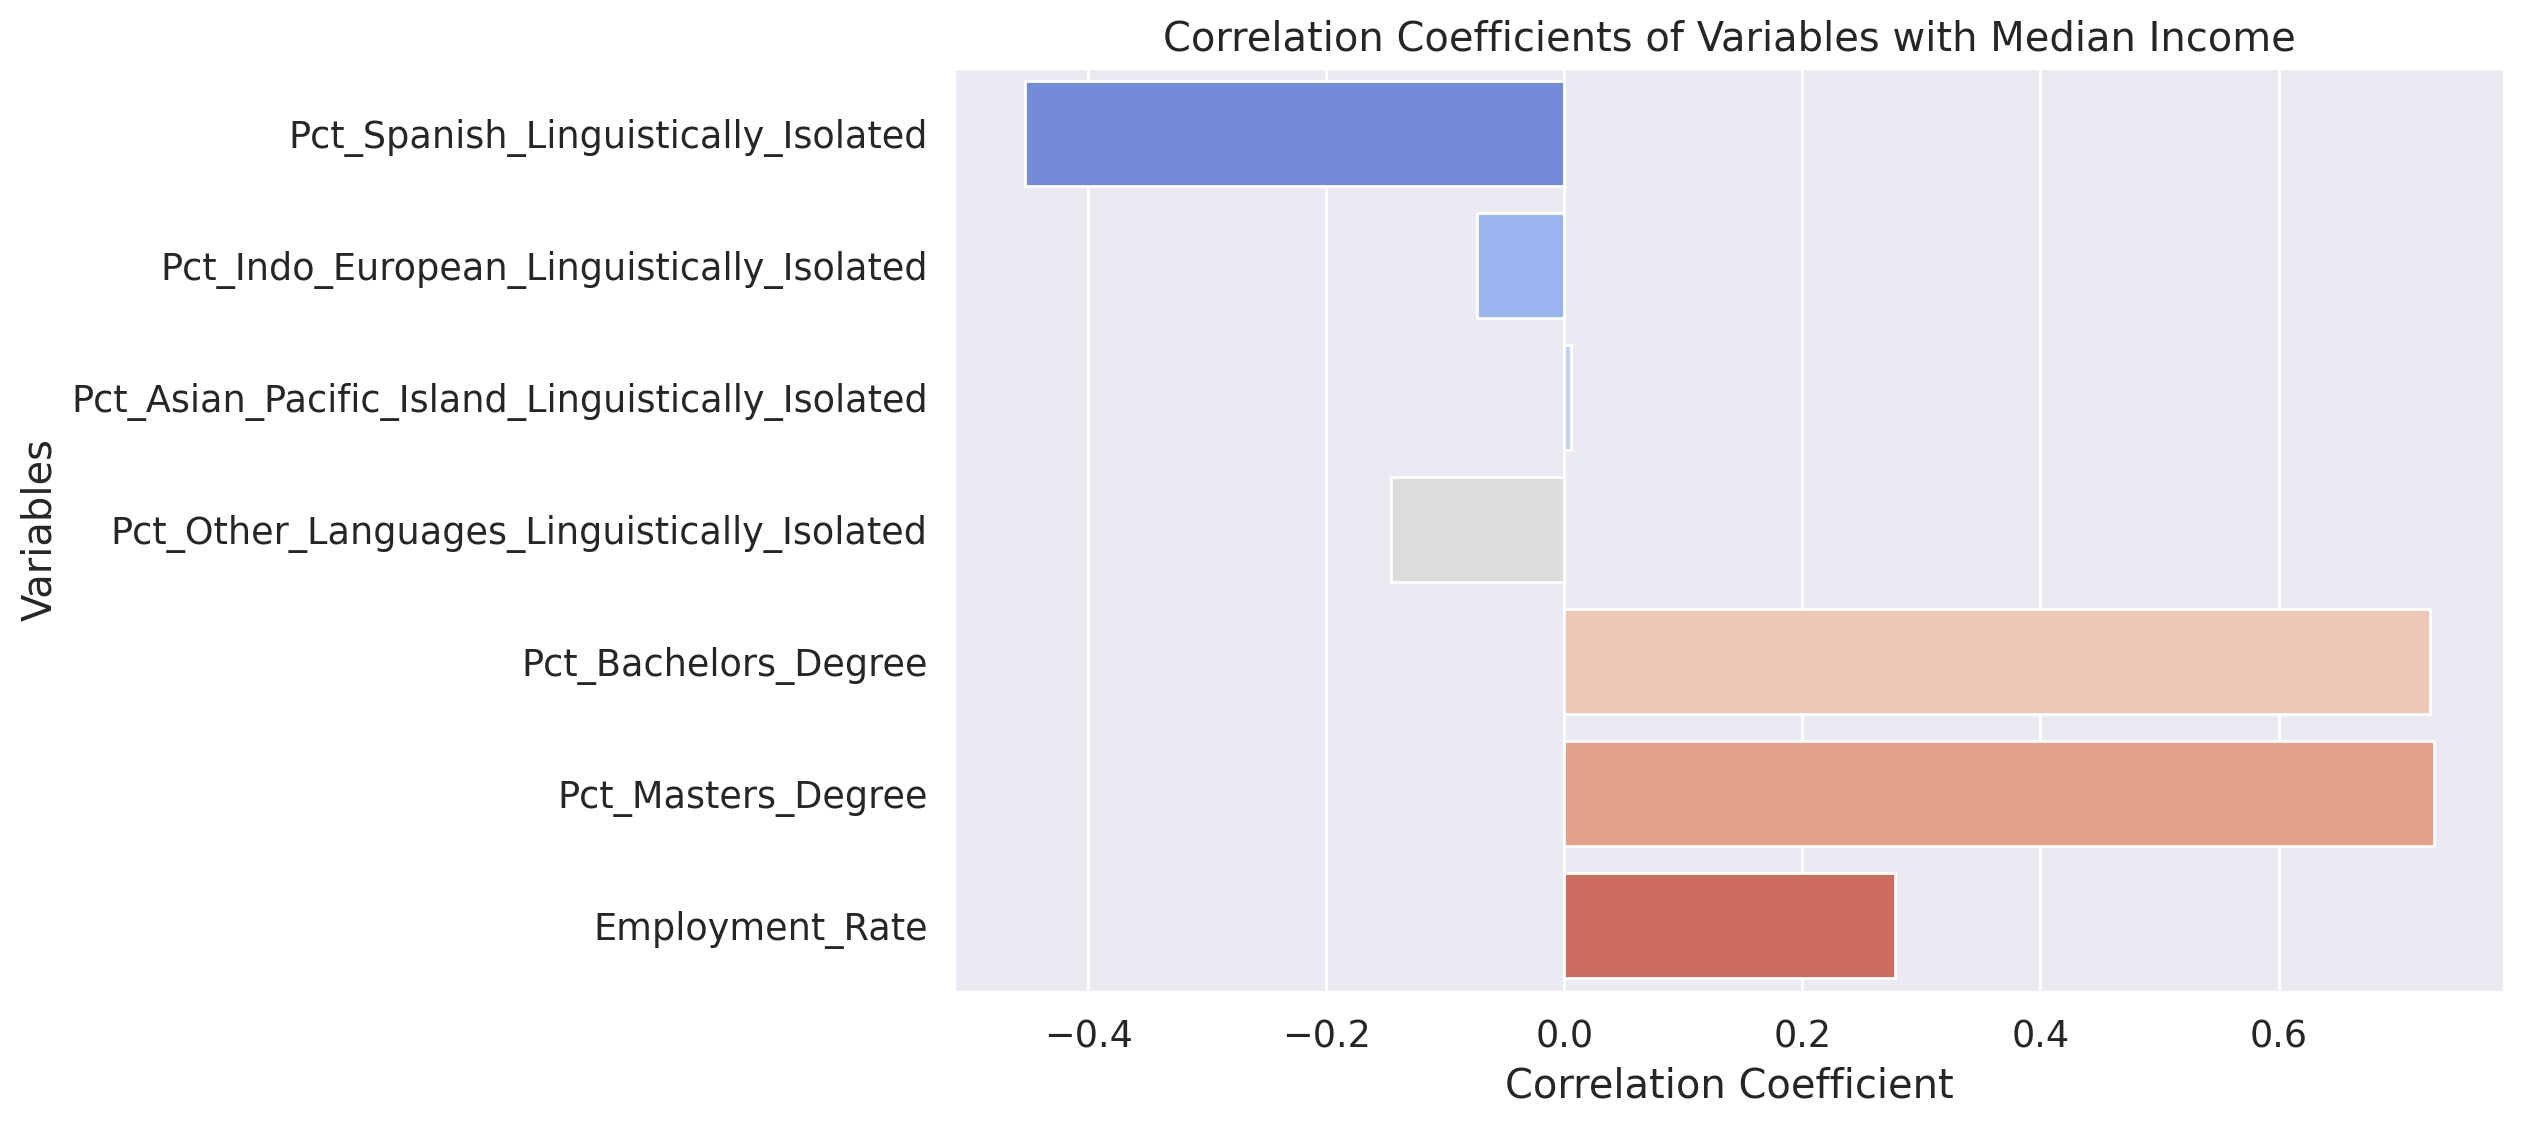

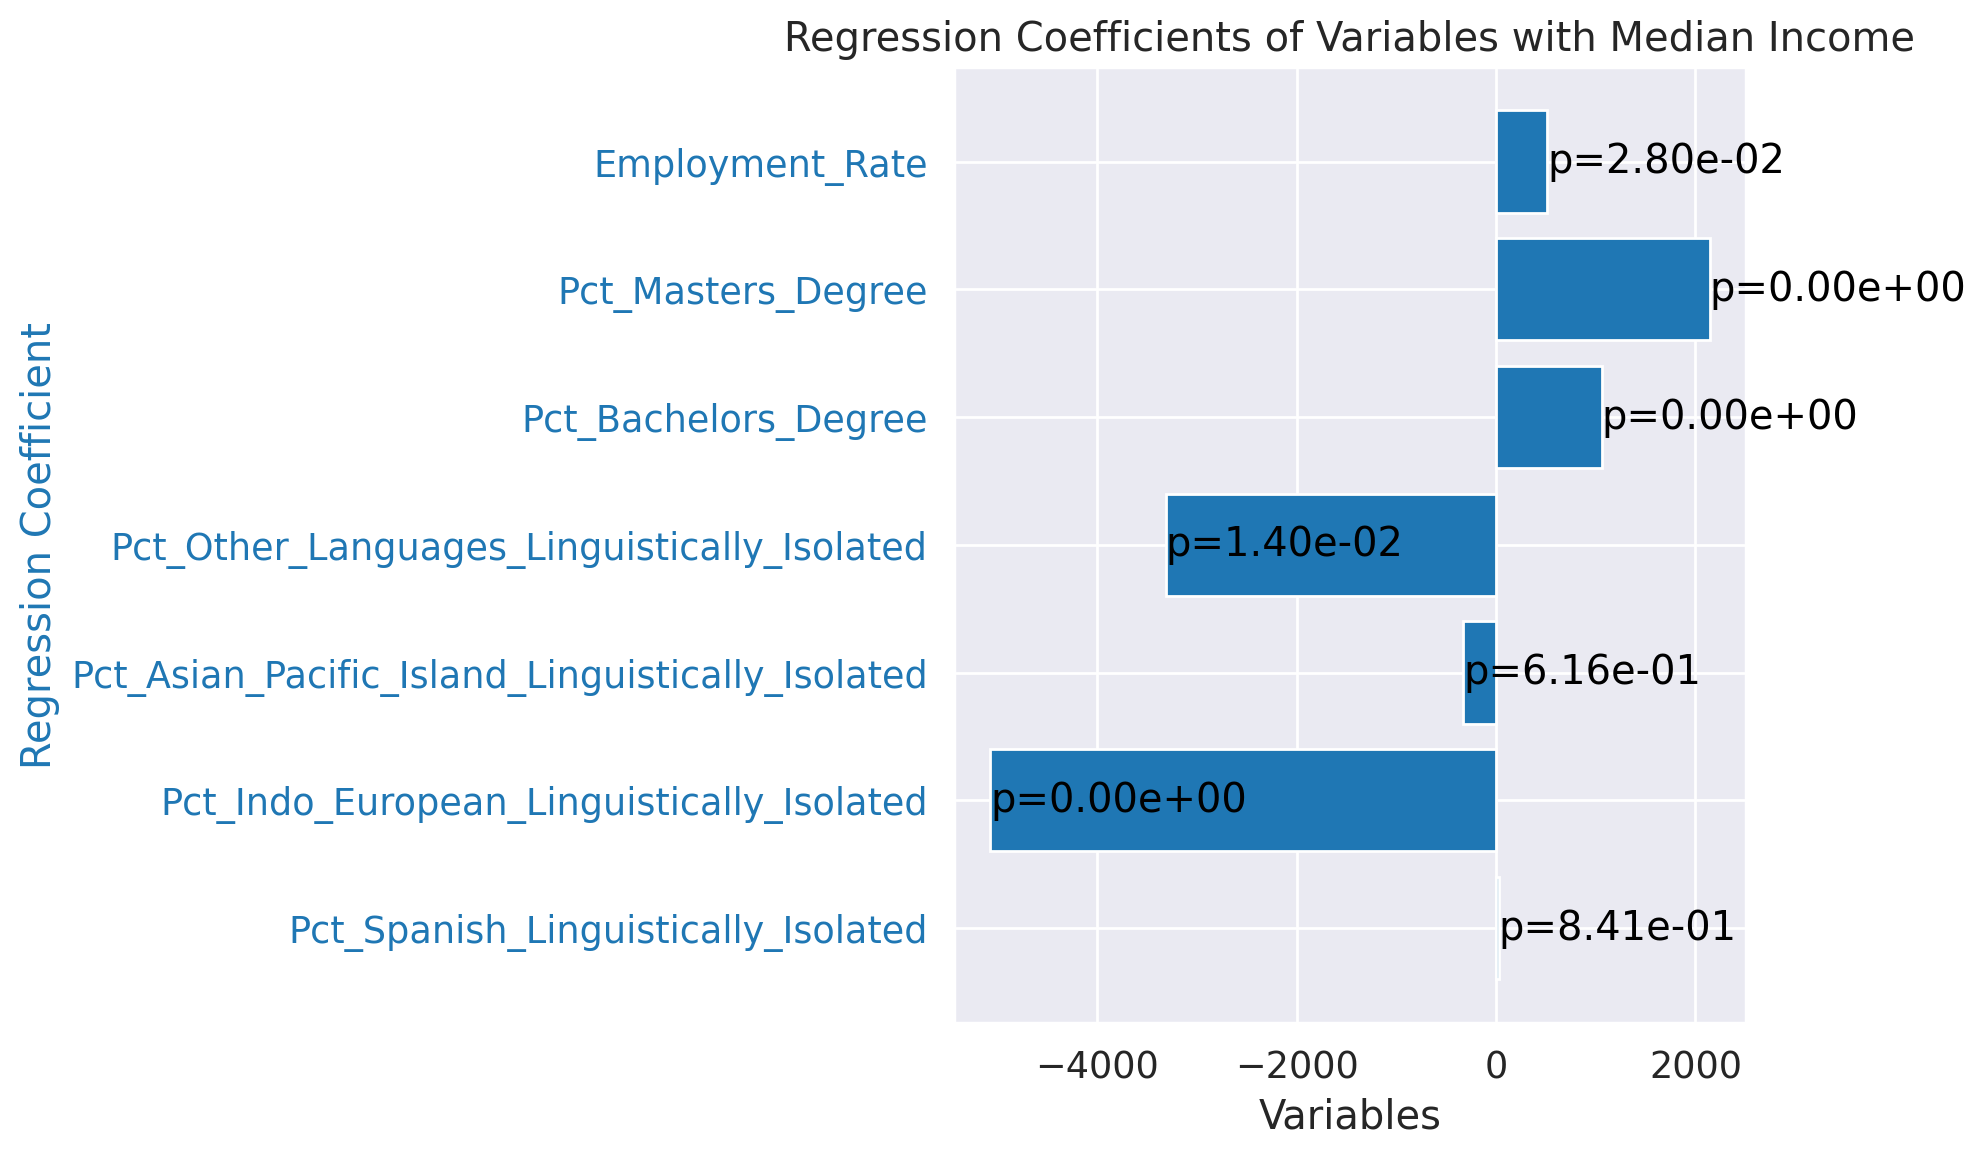

In [48]:
# Define the correlation and regression coefficients along with their p-values
correlation_data = {
    'Variables': ['Pct_Spanish_Linguistically_Isolated', 'Pct_Indo_European_Linguistically_Isolated',
                  'Pct_Asian_Pacific_Island_Linguistically_Isolated', 'Pct_Other_Languages_Linguistically_Isolated',
                  'Pct_Bachelors_Degree', 'Pct_Masters_Degree', 'Employment_Rate'],
    'Correlation Coefficient': [-0.453345, -0.0730991, 0.0058609, -0.145565, 0.727011, 0.730413, 0.277483]
}

regression_data = {
    'Variables': ['Pct_Spanish_Linguistically_Isolated', 'Pct_Indo_European_Linguistically_Isolated',
                  'Pct_Asian_Pacific_Island_Linguistically_Isolated', 'Pct_Other_Languages_Linguistically_Isolated',
                  'Pct_Bachelors_Degree', 'Pct_Masters_Degree', 'Employment_Rate'],
    'Regression Coefficient': [26.709377, -5073.821306, -330.667158, -3315.256480, 1059.237983, 2141.373816, 509.766002],
    'P-value': [0.841, 0.000, 0.616, 0.014, 0.000, 0.000, 0.028]
}

correlation_df = pd.DataFrame(correlation_data)
regression_df = pd.DataFrame(regression_data)

# Plotting correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation Coefficient', y='Variables', data=correlation_df, hue='Variables', dodge=False, palette='coolwarm', legend=False)
plt.title('Correlation Coefficients of Variables with Median Income')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

# Plotting regression coefficients
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Variables')
ax1.set_ylabel('Regression Coefficient', color=color)
ax1.barh(regression_df['Variables'], regression_df['Regression Coefficient'], color=color, align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Adding the p-values on the bars
for index, value in enumerate(regression_df['Regression Coefficient']):
    plt.text(value, index, f'p={regression_df["P-value"][index]:.2e}', color='black', ha='left', va='center')

plt.title('Regression Coefficients of Variables with Median Income')
fig.tight_layout()
plt.show()

In [51]:
!ls

'ACS API Example.ipynb'
 Employment_Rate.png
'Household Income Data'
'Language Isolation Data'
 Median_Income.png
'PROJECT 2.ipynb'
'PROJECT 3-Copy1.ipynb'
 Pct_Asian_Pacific_Island_Linguistically_Isolated.png
 Pct_Bachelors_Degree.png
 Pct_Indo_European_Linguistically_Isolated.png
 Pct_Masters_Degree.png
 Pct_Other_Languages_Linguistically_Isolated.png
 Pct_Spanish_Linguistically_Isolated.png
'Project 1.ipynb'
 correlation_matrix1.pdf
 correlation_matrix1.png
'csv project attempt.ipynb'
 graphs.png
 usa_00001.dat.gz
